In [1]:
import chipwhisperer as cw
import numpy as np
import scienceplots
import matplotlib.pyplot as plt

from measurement import Measurements

/home/nico/miniconda3/envs/simon/lib/python3.13/site-packages/chipwhisperer/capture/trace/TraceWhisperer.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources # type: ignore


# Import Trace

In [2]:
project = cw.import_project("./traces/07_simon_plain_50000/trace.zip", overwrite=True)
# project = cw.import_project("./traces/10_simon_masked_50000/trace.zip", overwrite=True)
# project = cw.import_project("./traces/12_simon_masked_50000/trace.zip", overwrite=True)

In [3]:
TOTAL_NUM_MEASUREMENTS = len(project.traces)
TOTAL_VALS_PER_MEASUREMENT = len(project.traces[0].wave)

# Transform Trace Project into Measurement object

In [4]:
plaintexts = np.zeros((TOTAL_NUM_MEASUREMENTS, 2), dtype=np.uint32)
ciphertexts = np.zeros((TOTAL_NUM_MEASUREMENTS, 2), dtype=np.uint32)
powers = np.zeros((TOTAL_NUM_MEASUREMENTS, TOTAL_VALS_PER_MEASUREMENT), dtype=np.uint32)

for i, trace in enumerate(project.traces):

    pt = trace.textin
    ct = trace.textout

    plaintexts[i,0] = pt[0] << 24 | pt[1] << 16 | pt[2] << 8 | pt[3]
    plaintexts[i,1] = pt[4] << 24 | pt[5] << 16 | pt[6] << 8 | pt[7]

    ciphertexts[i,0] = ct[0] << 24 | ct[1] << 16 | ct[2] << 8 | ct[3]
    ciphertexts[i,1] = ct[4] << 24 | ct[5] << 16 | ct[6] << 8 | ct[7]
    powers[i,:] = trace.wave

measurements = Measurements(plaintexts, ciphertexts, powers)


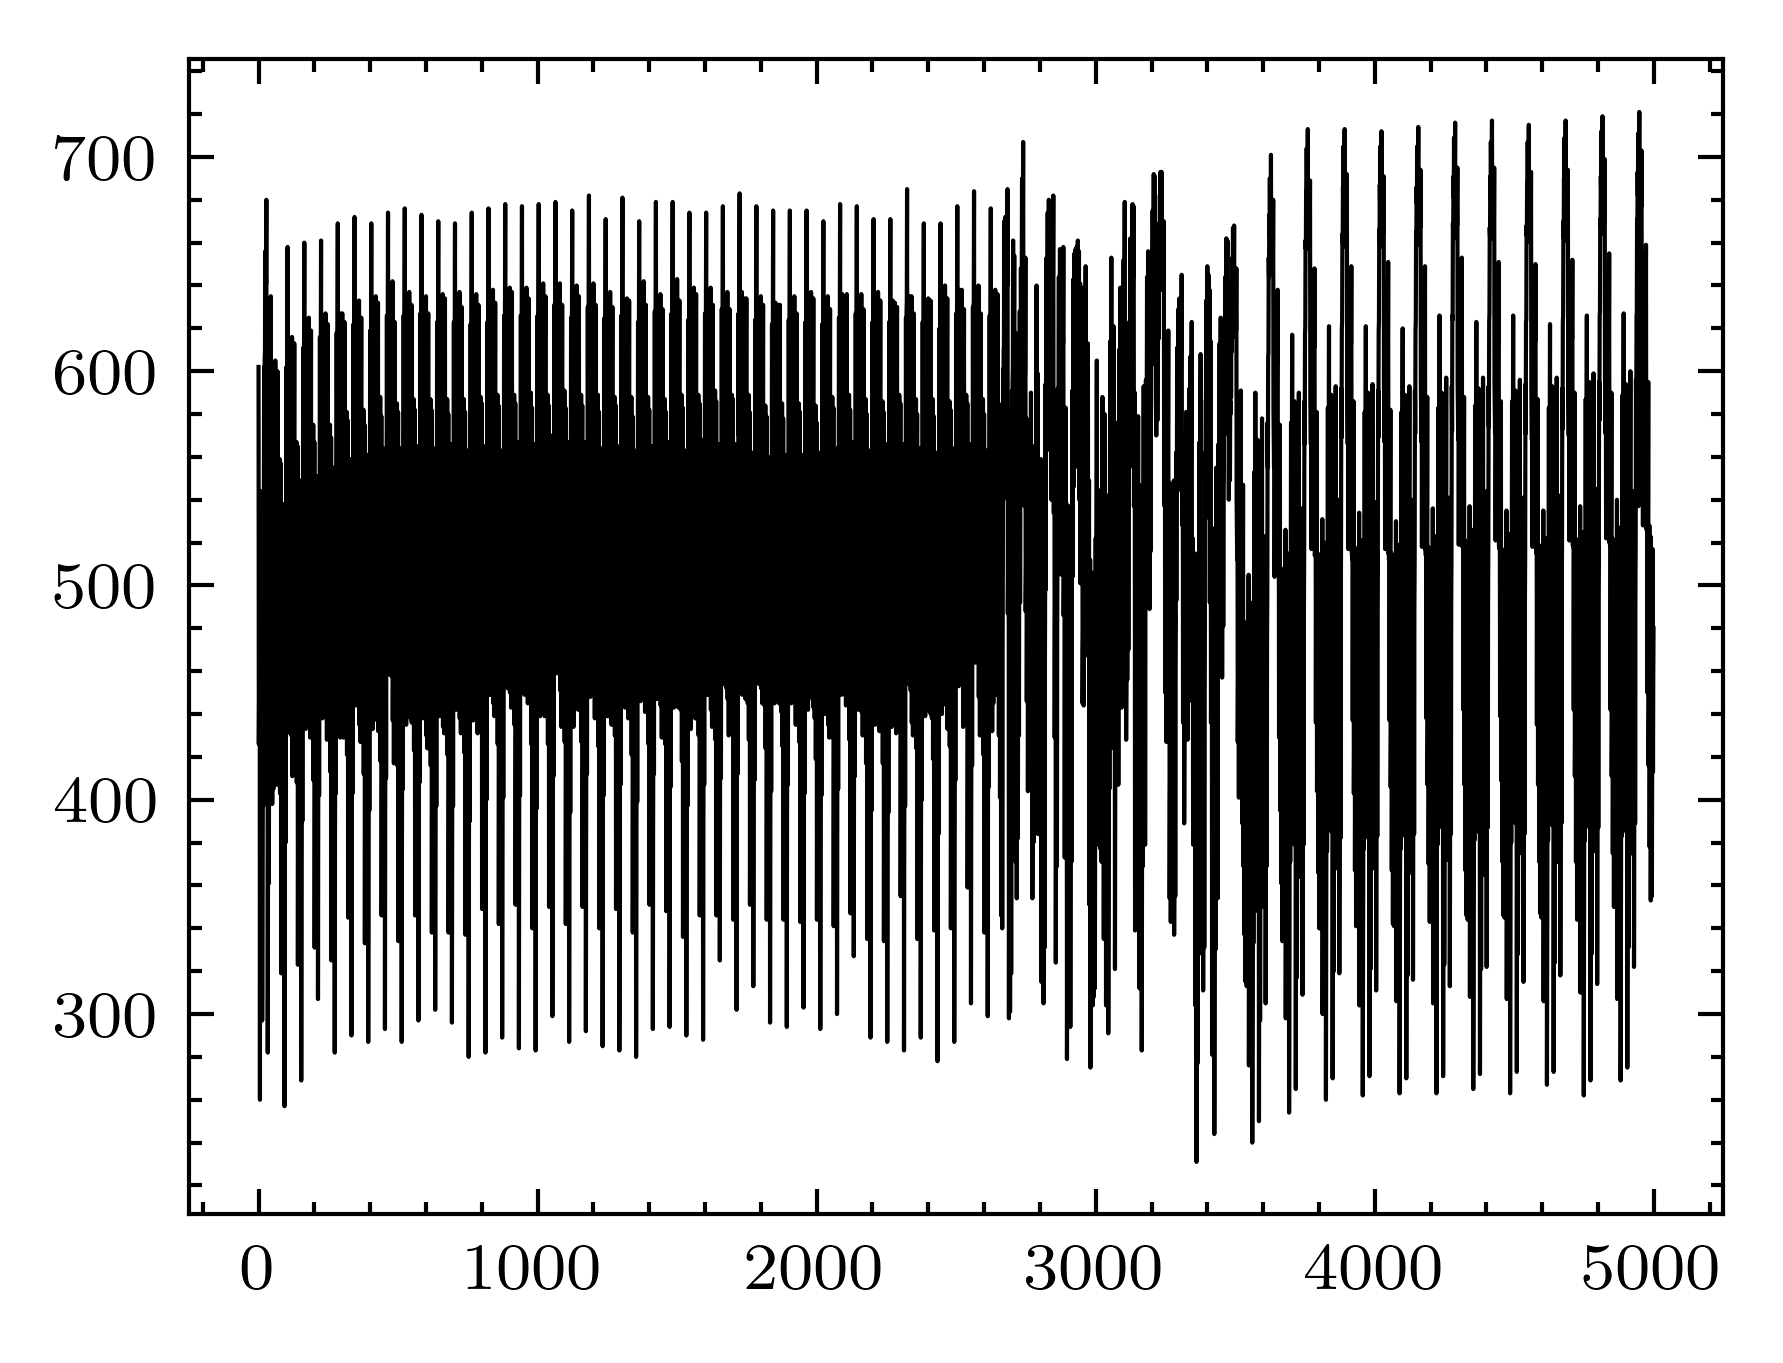

In [5]:
with plt.style.context(['science', 'ieee']):
    plt.plot(measurements[0].power, linewidth=0.5)
    plt.savefig("diagrams/power_graph.pdf")
    plt.savefig("diagrams/power_graph.pgf")